# 0.) Import and Clean data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [ ]:
#drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [6]:
df = pd.read_csv('bank-additional-full (1).csv',delimiter=';')

In [7]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [8]:
df = df.drop(["default", "pdays",	"previous",	"poutcome",	"emp.var.rate",	"cons.price.idx",	"cons.conf.idx",	"euribor3m",	"nr.employed"], axis = 1)
df = pd.get_dummies(df, columns = ["loan", "job","marital","housing","contact","day_of_week", "campaign", "month", "education"],drop_first = True)

In [9]:
df.head()

,age,duration,y,loan_unknown,loan_yes,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,month_nov,month_oct,month_sep,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown
0,56,261,no,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,57,149,no,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,37,226,no,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,40,151,no,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,56,307,no,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [11]:
y = pd.get_dummies(df["y"], drop_first = True)
X = df.drop(["y"], axis = 1)

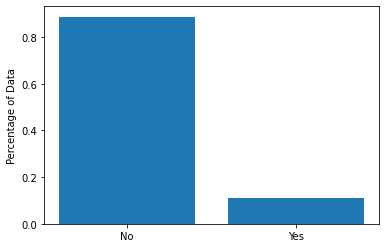

In [ ]:
obs = len(y)
plt.bar(["No","Yes"],[len(y[y.yes==0])/obs,len(y[y.yes==1])/obs])
plt.ylabel("Percentage of Data")
plt.show()

In [12]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler().fit(X_train)

X_scaled = scaler.transform(X_train)
X_test = scaler.transform(X_test)


#1.) Based on the visualization above, use your expert opinion to transform the data based on what we learned this quarter

In [13]:
from imblearn.over_sampling import RandomOverSampler

In [14]:
ros = RandomOverSampler()

In [15]:
###############
###TRANSFORM###
###############


X_scaled, y_train = ros.fit_resample(X_scaled, y_train)

# 2.) Build and visualize a decision tree of Max Depth 3. Show the confusion matrix.

In [35]:
dtree_main = DecisionTreeClassifier(max_depth = 3)
dtree_main.fit(X_scaled, y_train)

DecisionTreeClassifier(max_depth=3)

In [16]:
dtree = DecisionTreeClassifier(max_depth = 3)
dtree.fit(X_scaled, y_train)

DecisionTreeClassifier(max_depth=3)

[Text(0.5, 0.875, 'duration <= -0.028\ngini = 0.5\nsamples = 51160\nvalue = [25580, 25580]\nclass = No'),
 Text(0.25, 0.625, 'duration <= -0.386\ngini = 0.377\nsamples = 24175\nvalue = [18084, 6091]\nclass = No'),
 Text(0.125, 0.375, 'month_oct <= 3.6\ngini = 0.248\nsamples = 14377\nvalue = [12295, 2082]\nclass = No'),
 Text(0.0625, 0.125, 'gini = 0.22\nsamples = 13890\nvalue = [12146, 1744]\nclass = No'),
 Text(0.1875, 0.125, 'gini = 0.425\nsamples = 487\nvalue = [149, 338]\nclass = Yes'),
 Text(0.375, 0.375, 'month_may <= 0.36\ngini = 0.483\nsamples = 9798\nvalue = [5789, 4009]\nclass = No'),
 Text(0.3125, 0.125, 'gini = 0.5\nsamples = 7232\nvalue = [3541, 3691]\nclass = Yes'),
 Text(0.4375, 0.125, 'gini = 0.217\nsamples = 2566\nvalue = [2248, 318]\nclass = No'),
 Text(0.75, 0.625, 'duration <= 1.029\ngini = 0.401\nsamples = 26985\nvalue = [7496, 19489]\nclass = Yes'),
 Text(0.625, 0.375, 'contact_telephone <= 0.283\ngini = 0.482\nsamples = 14255\nvalue = [5765, 8490]\nclass = Yes'),

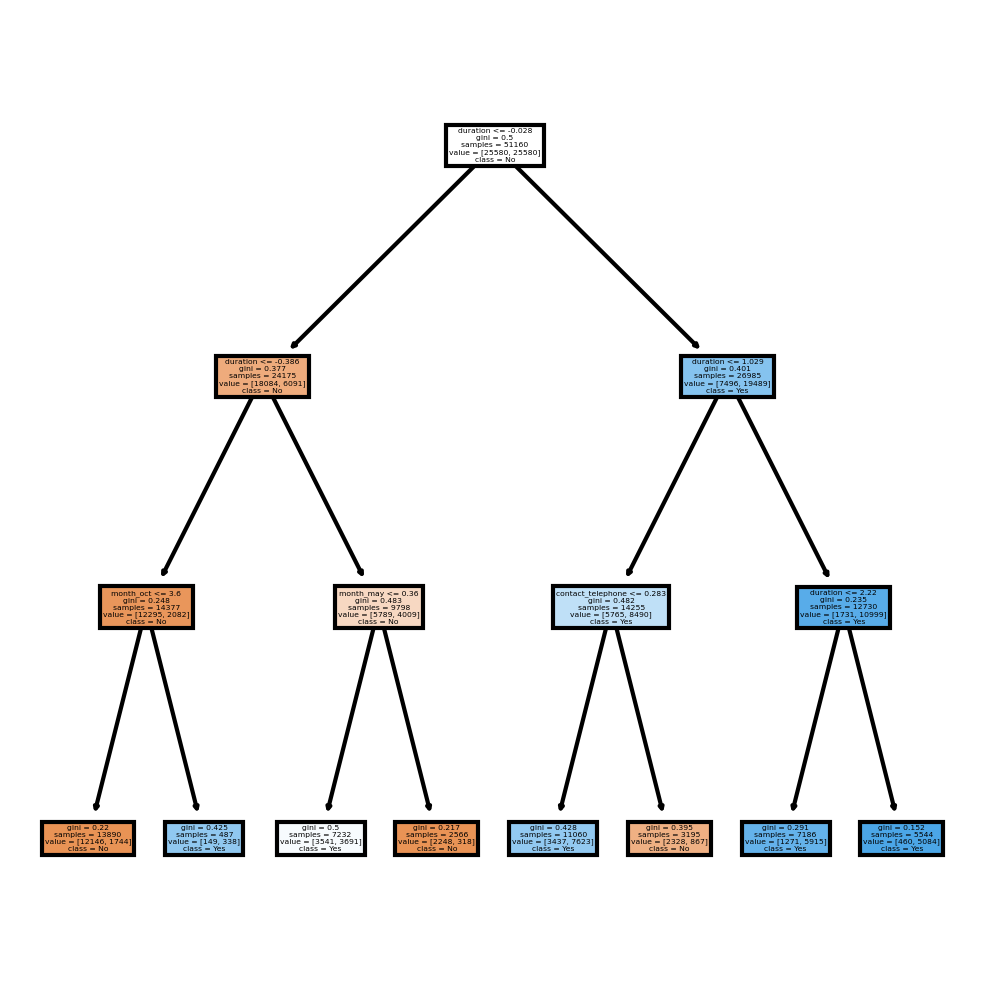

In [17]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
plot_tree(dtree, filled = True, feature_names = X.columns, class_names=["No","Yes"])


#fig.savefig('imagename.png')

# 1b.) Confusion matrix on out of sample data. Visualize and store as variable

In [18]:
y_pred = dtree.predict(X_test)
y_true = y_test
cm_raw = confusion_matrix(y_true, y_pred)

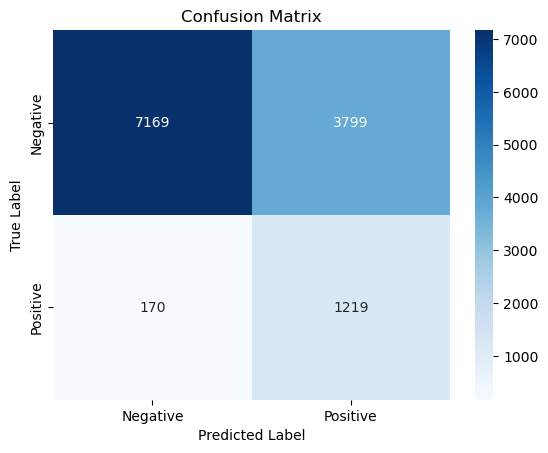

In [19]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 3.) Use bagging on your descision tree

In [20]:
dtree = DecisionTreeClassifier(max_depth=3)

In [21]:
bagging = BaggingClassifier(estimator = dtree,
                            n_estimators = 100,
                            max_samples = .5,
                            max_features = 1.)

In [22]:
bagging.fit(X_scaled,y_train)
y_pred = bagging.predict(X_test)

/Users/liubijun/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_bagging.py:782: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [23]:
y_true = y_test
cm_raw = confusion_matrix(y_true,y_pred)

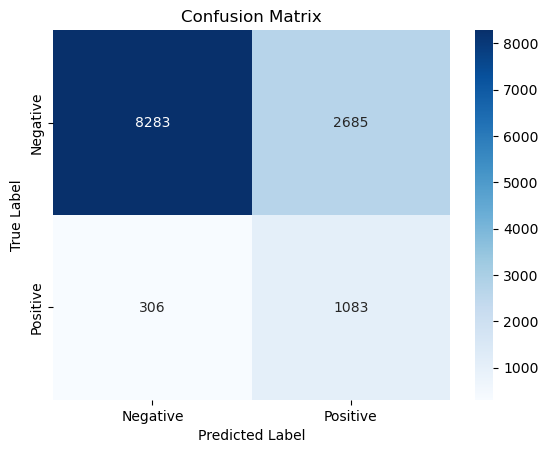

In [24]:
class_labels = ['Negative', 'Positive']

sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 4.) Boost your tree

In [25]:
from sklearn.ensemble import AdaBoostClassifier

In [26]:
dtree = DecisionTreeClassifier(max_depth = 3)
boost = AdaBoostClassifier(estimator = dtree,
                           n_estimators = 100,
                           learning_rate = .1)


In [27]:
boost.fit(X_scaled,y_train)

/Users/liubijun/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/liubijun/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3),
                   learning_rate=0.1, n_estimators=100)

In [29]:
y_pred = boost.predict(X_test)
y_true = y_test
cm_raw = confusion_matrix(y_true,y_pred)

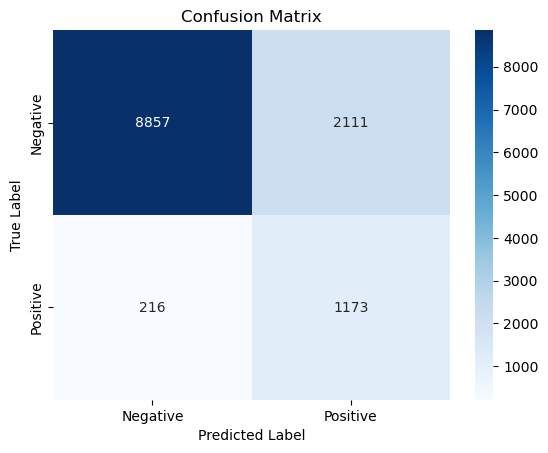

In [30]:
class_labels = ['Negative', 'Positive']

sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 5.) Create a superlearner with at least 4 base learner models. Use a logistic reg for your metalearner. Interpret your coefficients and save your CM.

In [31]:
pip install mlens

  Obtaining dependency information for mlens from https://files.pythonhosted.org/packages/0b/f7/c04bda423ac93ddb54bc4c3a21c79c9a24bc83844efc30dc4c11c289e894/mlens-0.2.3-py2.py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.7/227.7 kB 6.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [33]:
from sklearn.linear_model import LogisticRegression

In [36]:
base_predictions = [dtree_main.predict(X_scaled),
                    list(boost.predict(X_scaled)), 
                    list(bagging.predict(X_scaled))]

In [37]:
base_predictions = np.column_stack(base_predictions)

In [38]:
super_learner = LogisticRegression()

In [39]:
super_learner.fit(base_predictions,y_train)

/Users/liubijun/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [40]:
super_learner.coef_ #indicates the weight for each model, the higher the better

array([[0.9591524 , 2.84291089, 0.02489913]])

# 6.)

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble

Best Hyperparameters: {'base_estimator': LogisticRegression(), 'max_features': 0.7, 'max_samples': 0.5, 'n_estimators': 50}
Best Accuracy Score: 0.9289999999999999
